In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Import   libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/NF/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


###Explore data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Shape of the dataset

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.duplicated('title')

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

#checking for null values

In [ ]:
df.isnull().sum() 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#Data cleaning

 replaced all the Nan values in the country column with United States as Netflix was created in the USA and every show is aired on Netflix US. So instead of dropping the whole column we just replaced the values in it in order to save our data.


In [ ]:
df['country'].replace(np.nan, 'United States',inplace  = True)

In [ ]:
df['director'].replace(np.nan, 'No Director',inplace=True)
df['cast'].replace(np.nan, 'No Cast',inplace=True)
df['country'].replace(np.nan, 'Not Specify',inplace=True)
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [ ]:
df = df.dropna()
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [ ]:
df['listed_in'].value_counts()

Dramas, International Movies                                   362
Documentaries                                                  359
Stand-Up Comedy                                                334
Comedies, Dramas, International Movies                         274
Dramas, Independent Movies, International Movies               252
                                                              ... 
Crime TV Shows, International TV Shows, TV Sci-Fi & Fantasy      1
International TV Shows, TV Horror, TV Sci-Fi & Fantasy           1
Crime TV Shows, Kids' TV                                         1
Horror Movies, International Movies, Sci-Fi & Fantasy            1
Cult Movies, Dramas, Thrillers                                   1
Name: listed_in, Length: 513, dtype: int64

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

##Data Analysis
looking at number of Movies and TV shows

<Axes: xlabel='type', ylabel='count'>

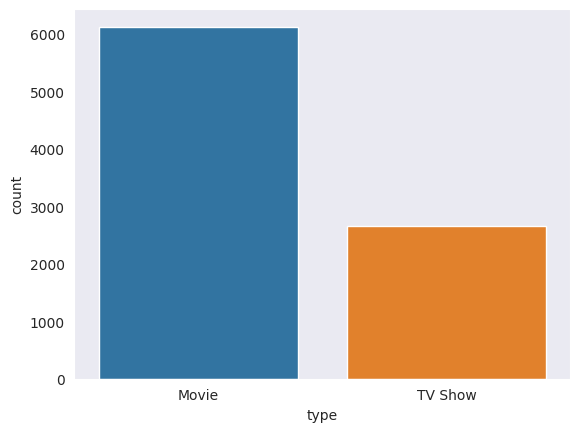

In [ ]:
sns.countplot(x='type',data = df) 

<Axes: xlabel='rating', ylabel='count'>

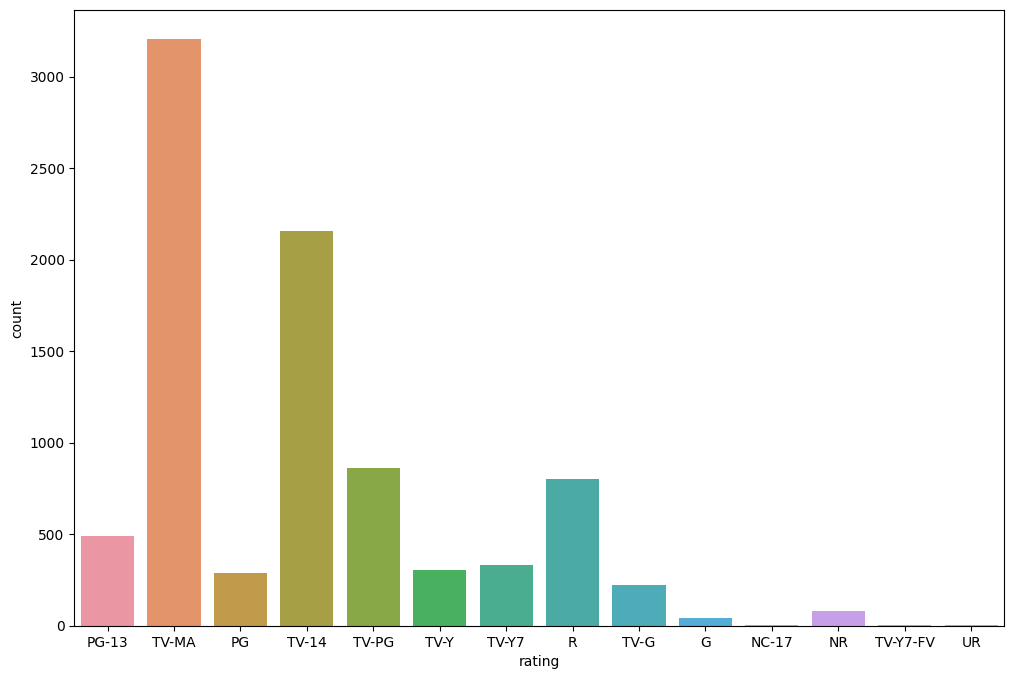

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df)

<Axes: xlabel='rating', ylabel='count'>

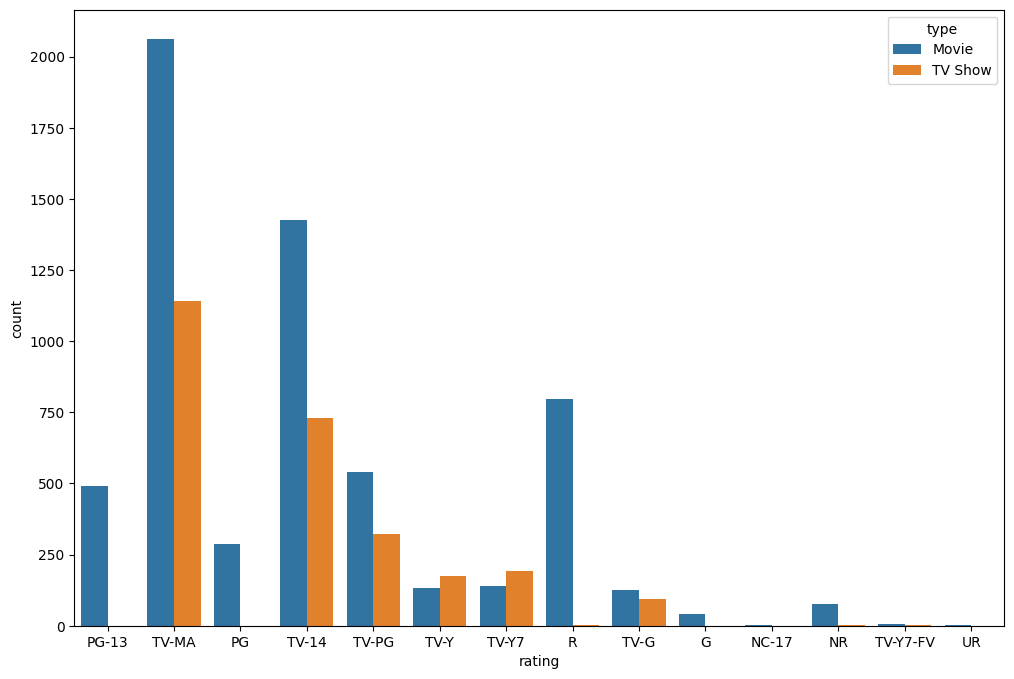

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = df,hue='type')

#oldest movies available on netflix

In [ ]:
old = df.sort_values("release_year", ascending = True) 
old = old[old['duration'] != ""]
old[['title', "release_year"]][:15]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8763,WWII: Report from the Aleutians,1943
8739,Why We Fight: The Battle of Russia,1943
8660,Undercover: How to Operate Behind Enemy Lines,1943
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
7575,Nazi Concentration Camps,1945


#standup shows on Netflix

In [ ]:
tag = "Stand-Up Comedy" 
df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = df[df["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

,title,country,release_year
359,The Original Kings of Comedy,United States,2000
388,Plastic Cup Boyz: Laughing My Mask Off!,United States,2021
400,Revelations: The Masters of the Universe: Reve...,United States,2021
475,The Stand-Up,United States,2019
484,Lee Su-geun: The Sense Coach,United States,2021
511,Chelsea,United States,2017
826,Bo Burnham: Inside,United States,2021
1189,Nate Bargatze: The Greatest Average American,United States,2021
1191,The Fluffy Movie,United States,2014
1249,Blanche Gardin: The All-Nighter,United States,2021


#Kids TV shows on Netflix

In [ ]:
tag = "Kids' TV" 
df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = df[df["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

,title,country,release_year
34,Tayo and Little Wizards,United States,2020
40,He-Man and the Masters of the Universe,United States,2021
67,Saved by the Bell,United States,1994
85,Pokémon Master Journeys: The Series,United States,2021
87,Titipo Titipo,United States,2019
89,Mighty Raju,United States,2017
97,Kid Cosmic,United States,2021
100,Tobot Galaxy Detectives,United States,2019
106,Bunk'd,United States,2021
123,Luv Kushh,United States,2012


In [ ]:
df_countries = pd.DataFrame(df.country.value_counts().reset_index().values, columns=["country", "count"])
df_countries.head()

,country,count
0,United States,3638
1,India,972
2,United Kingdom,418
3,Japan,243
4,South Korea,199


In [ ]:
date = pd.DataFrame(df.release_year.value_counts().reset_index().values, columns=["Year", "Count"])
date.head()

,Year,Count
0,2018,1146
1,2017,1030
2,2019,1030
3,2020,953
4,2016,901


Text(0.5, 1.0, 'Frequency of Movies which were released in different years and are available on Netflix')

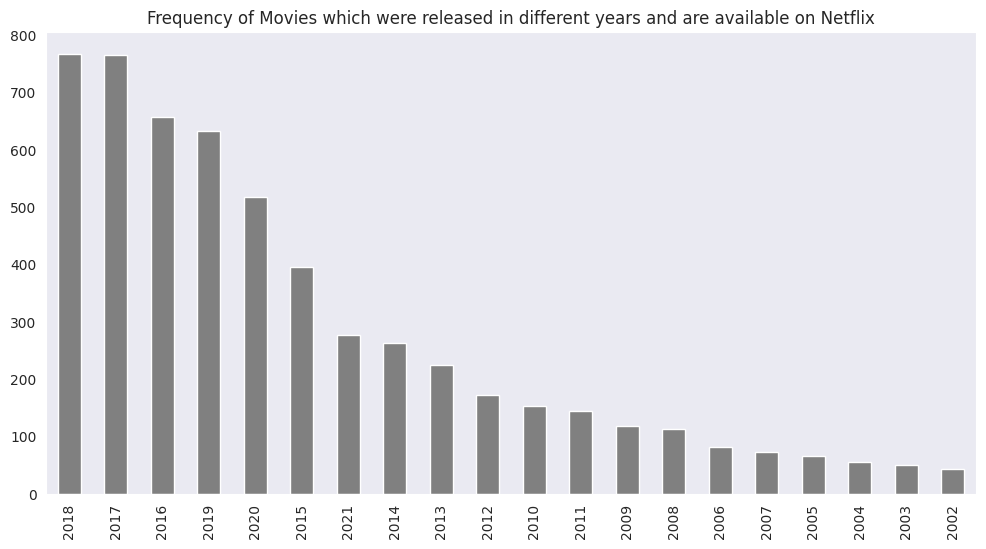

In [ ]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["release_year"].value_counts()[:20].plot(kind="bar",color="gray")
plt.title("Frequency of Movies which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Frequency of TV shows which were released in different years and are available on Netflix')

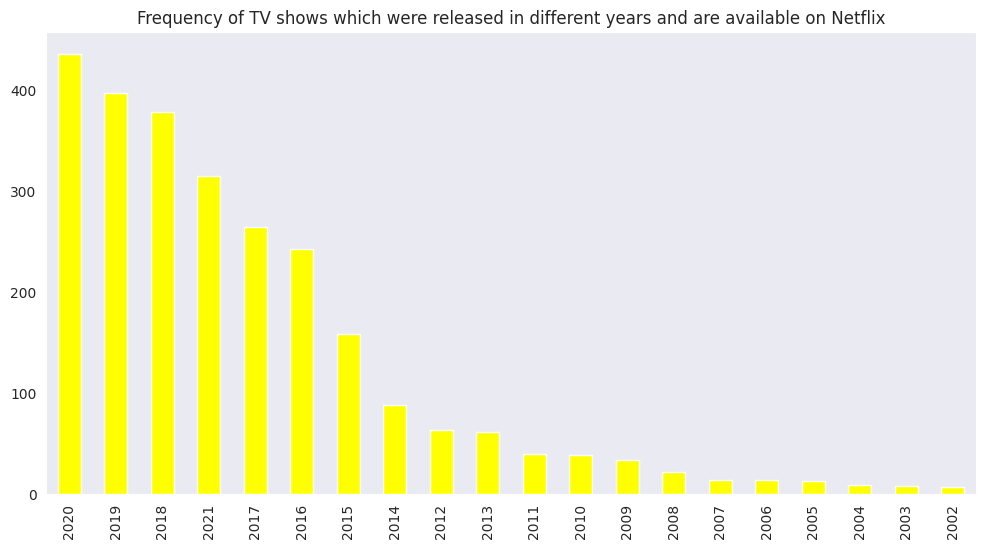

In [ ]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["release_year"].value_counts()[:20].plot(kind="bar",color="yellow")
plt.title("Frequency of TV shows which were released in different years and are available on Netflix")

Text(0.5, 1.0, 'Top 10 Genres of Movies')

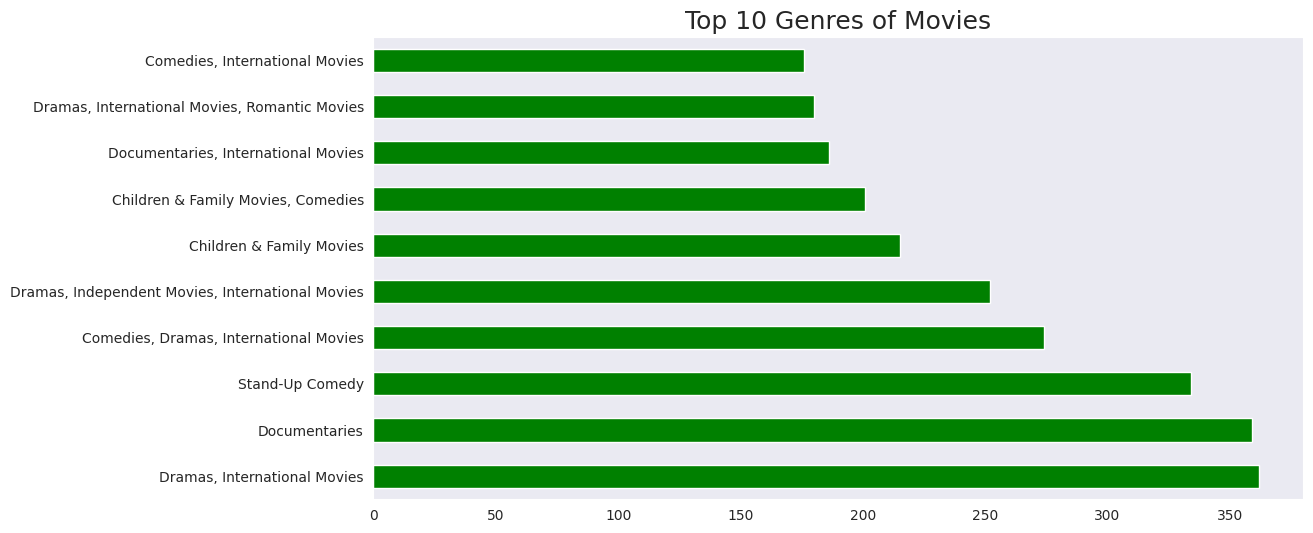

In [ ]:
plt.figure(figsize=(12,6))
df[df["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="green")
plt.title("Top 10 Genres of Movies",size=18)

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

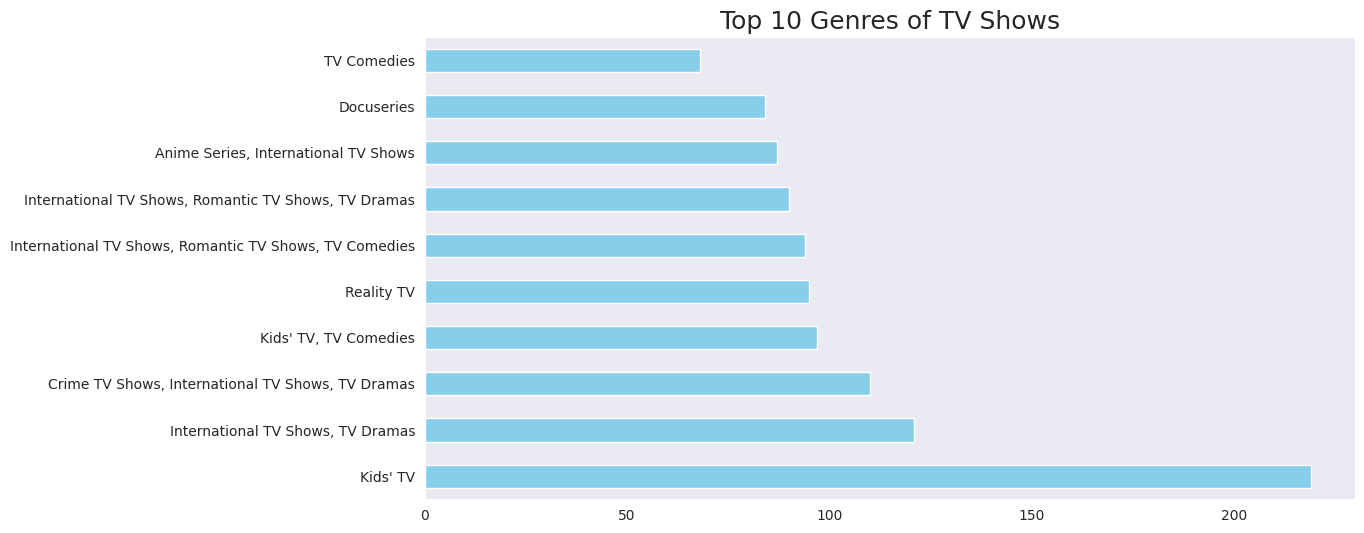

In [ ]:
plt.figure(figsize=(12,6))
df[df["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="skyblue")
plt.title("Top 10 Genres of TV Shows",size=18)

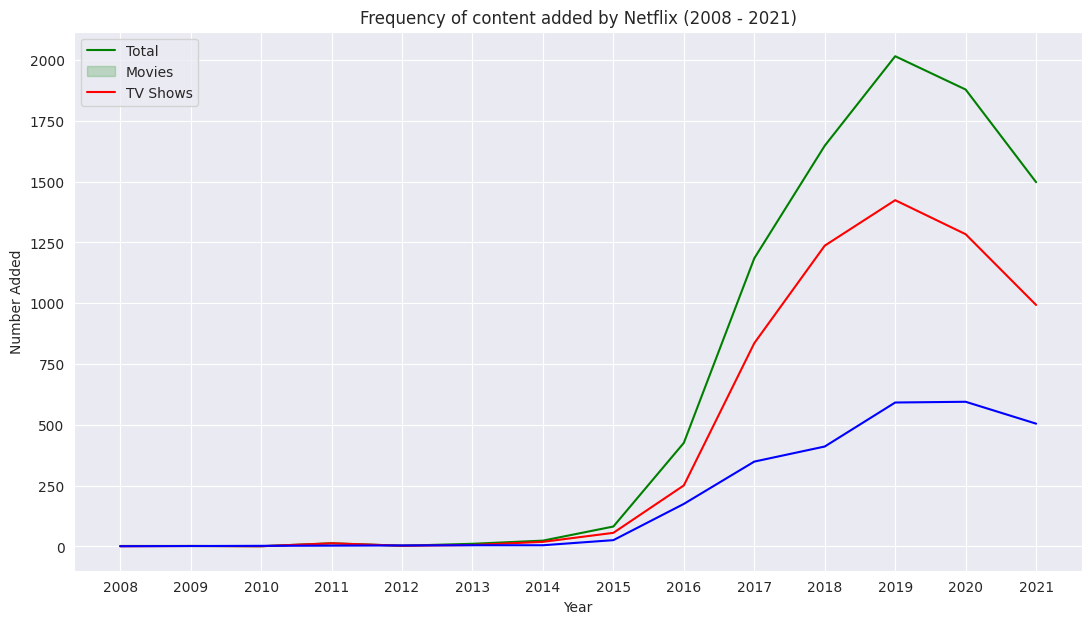

In [ ]:
#Creating Year Added column based on Date Added
netflix=df.copy()
netflix['year_added'] = pd.DatetimeIndex(netflix['date_added']).year
netflix['year_added'].apply(lambda x: int(x))

#temp dataframes to use for plots
netflix_total_df = netflix.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
netflix_movies_df = netflix[netflix['type']=="Movie"].year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
netflix_tv_df = netflix[netflix['type']=="TV Show"].year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})

fig, ax = plt.subplots(figsize=(13, 7))
plt.title("Frequency of content added by Netflix (2008 - 2021)")
plt.xlabel("Year")
plt.ylabel("Number Added")
ax.set_xticks(np.arange(2008, 2022, 1))
sns.set_style("dark")
sns.lineplot(data=netflix_total_df, x="year", y="count", color="green")
sns.lineplot(data=netflix_movies_df, x = "year", y="count", color="red")
sns.lineplot(data=netflix_tv_df, x = "year", y="count", color="blue")
plt.legend(['Total', 'Movies', "TV Shows"])
plt.grid()
plt.show()


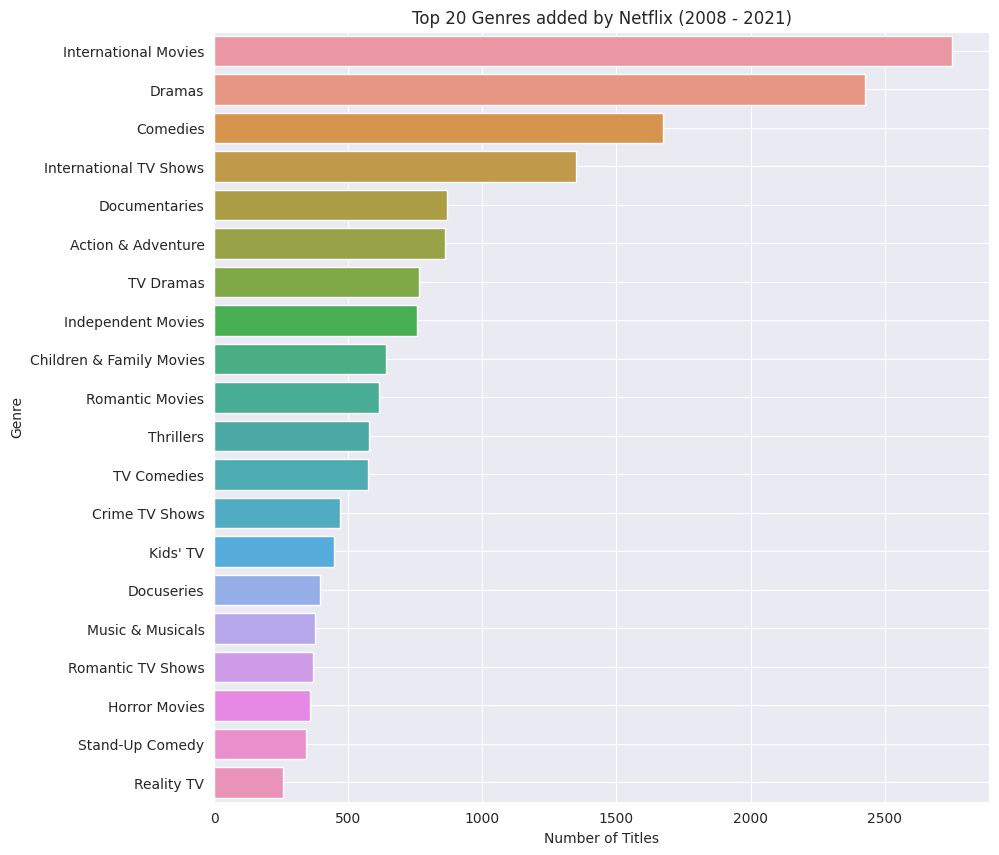

In [ ]:
#creating a temp dataframe containing all titles, genres and year added
genres = netflix.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genres_df = pd.DataFrame()
genres_df['genre'] = genres
years = netflix.set_index('title').year_added
description = netflix.set_index('title').description
a = pd.merge(genres_df, years, left_index=True, right_index=True)
temp = pd.merge(a, description, left_index=True, right_index=True)

plt.figure(figsize=(10, 10))
sns.countplot(y = 'genre', data = temp, order=temp.genre.value_counts().iloc[:20].index)
plt.title('Top 20 Genres added by Netflix (2008 - 2021)')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.grid()
plt.show()

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,relevant
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",0
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0


In [ ]:
df.director.value_counts()

No Director                       2621
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4527, dtype: int64

In [ ]:
newdata = df.groupby('rating').size().rename_axis('Rating').reset_index(name='Count')
nd = newdata.sort_values(by ='Count', ascending=True)
nd = nd.tail(5)
nd

,Rating,Count
4,PG-13,490
5,R,799
9,TV-PG,861
6,TV-14,2157
8,TV-MA,3205


In [ ]:
fil_directors = df['director'].str.split(',',expand=True).stack()
fil_directors= pd.DataFrame(fil_directors)
fil_directors.columns = ['director']
directors = fil_directors.groupby(['director']).size().reset_index(name='counts')
directors = directors.sort_values(by='counts',ascending=False)
directors = directors[directors['director'] != 'No Director']
directors = directors.head(5)
directors

,director,counts
4019,Rajiv Chilaka,22
4066,Raúl Campos,18
261,Jan Suter,18
4650,Suhas Kadav,16
3233,Marcus Raboy,16


In [ ]:
fil_actors = df['cast'].str.split(',',expand=True).stack()
fil_actors= pd.DataFrame(fil_actors)
fil_actors.columns = ['cast']
actors = fil_actors.groupby(['cast']).size().reset_index(name='counts')
actors = actors.sort_values(by='counts',ascending=False)
actors = actors[actors['cast'] != 'No Cast']
actors = actors.head(5)
actors

,cast,counts
2605,Anupam Kher,39
26903,Rupa Bhimani,31
30263,Takahiro Sakurai,30
15518,Julie Tejwani,28
23591,Om Puri,27


In [ ]:
dff = df[['type','release_year']]
dff = dff.rename(columns = {'release_year' : 'Release Year'})
dff2 = dff.groupby(['Release Year','type']).size().reset_index(name='Total Content')
dff2 = dff2[dff2['Release Year']>=2011]

In [ ]:
dff3 = dff2[dff2['type']=='Movie']
dff3

,Release Year,type,Total Content
97,2011,Movie,145
99,2012,Movie,173
101,2013,Movie,225
103,2014,Movie,264
105,2015,Movie,396
107,2016,Movie,658
109,2017,Movie,765
111,2018,Movie,767
113,2019,Movie,633
115,2020,Movie,517


In [ ]:
dff4 = dff2[dff2['type']=='TV Show']
dff4

,Release Year,type,Total Content
98,2011,TV Show,40
100,2012,TV Show,63
102,2013,TV Show,61
104,2014,TV Show,88
106,2015,TV Show,159
108,2016,TV Show,243
110,2017,TV Show,265
112,2018,TV Show,379
114,2019,TV Show,397
116,2020,TV Show,436


In [ ]:
features=['title','duration','type']
seasons= df[features]
seasons['no_of_seasons']=seasons['duration'].str.replace(' Season','')
seasons['no_of_seasons']=seasons['no_of_seasons'].str.replace('s','')
seasons = seasons[seasons['type']=='TV Show']
seasons['no_of_seasons']=seasons['no_of_seasons'].astype(str).astype(int)
seasons = seasons.drop('duration', axis= 1)
seasons = seasons.sort_values('no_of_seasons', ascending=False)
seasons = seasons.head(5)
seasons

<ipython-input-63-98d765a93711>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons['no_of_seasons']=seasons['duration'].str.replace(' Season','')
<ipython-input-63-98d765a93711>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons['no_of_seasons']=seasons['no_of_seasons'].str.replace('s','')


,title,type,no_of_seasons
548,Grey's Anatomy,TV Show,17
2423,Supernatural,TV Show,15
4798,NCIS,TV Show,15
4220,COMEDIANS of the world,TV Show,13
1354,Heartland,TV Show,13
